<a href="https://colab.research.google.com/github/rachelherlinda/Data-Mining-Class/blob/master/Tugas_ML_1_NLP_Rachel_Herlinds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Rachel Herlinda**
## FGA Machine Learning - 0182180140-36
## Tugas NLP ML Pengembangan

In [1]:
import pandas as pd

Data from UCI Machine Learning, Amazon reviews

In [4]:
data = pd.read_csv('/tmp/amazon_cells_labelled.txt', sep='\t', header=None)
data.columns = ["Reviews", "Status"] #status: 0 for negative review, 1 for positive reviews

In [5]:
data.head()

,Reviews,Status
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Memastikan data memiliki minimal 1000 sampel

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
 1   Status   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Mengubah data ke dalam bentuk array

In [7]:
reviews = data['Reviews'].values
label = data[['Status']].values

Membagi data ke dalam training dan testing

In [8]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, label_train, label_test = train_test_split(reviews, label, test_size=0.2)

Tokenizer

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=200, oov_token='x')
tokenizer.fit_on_texts(reviews_train) 
tokenizer.fit_on_texts(reviews_test)
 
sekuens_train = tokenizer.texts_to_sequences(reviews_train)
sekuens_test = tokenizer.texts_to_sequences(reviews_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

Model Sequential, Embedding, LSTM

In [34]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Penggunaan Callbacks

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [21]:
import numpy as np

In [23]:
status_train = np.asarray(label_train).astype('int32')
status_test = np.asarray(label_test).astype('int32')

Melatih model

In [35]:
num_epochs = 30
history = model.fit(padded_train, status_train, epochs=num_epochs, 
                    validation_data=(padded_test, status_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
25/25 - 4s - loss: 0.6917 - accuracy: 0.5175 - val_loss: 0.6887 - val_accuracy: 0.5500
Epoch 2/30
25/25 - 0s - loss: 0.6731 - accuracy: 0.6125 - val_loss: 0.6535 - val_accuracy: 0.6850
Epoch 3/30
25/25 - 0s - loss: 0.5808 - accuracy: 0.7300 - val_loss: 0.5057 - val_accuracy: 0.7700
Epoch 4/30
25/25 - 0s - loss: 0.4628 - accuracy: 0.7775 - val_loss: 0.5378 - val_accuracy: 0.7150
Epoch 5/30
25/25 - 0s - loss: 0.3899 - accuracy: 0.8300 - val_loss: 0.5494 - val_accuracy: 0.7100
Epoch 6/30
25/25 - 0s - loss: 0.3553 - accuracy: 0.8450 - val_loss: 0.5239 - val_accuracy: 0.7750
Epoch 7/30
25/25 - 0s - loss: 0.3279 - accuracy: 0.8537 - val_loss: 0.5398 - val_accuracy: 0.7550
Epoch 8/30
25/25 - 0s - loss: 0.3134 - accuracy: 0.8587 - val_loss: 0.5601 - val_accuracy: 0.7700
Epoch 9/30
25/25 - 0s - loss: 0.2873 - accuracy: 0.8863 - val_loss: 0.5706 - val_accuracy: 0.7750
Epoch 10/30
25/25 - 0s - loss: 0.2635 - accuracy: 0.8938 - val_loss: 0.6255 - val_accuracy: 0.7450
Epoch 11/30
25/25 -

Membuat plot loss dan accuracy

In [36]:
import matplotlib.pyplot as plt

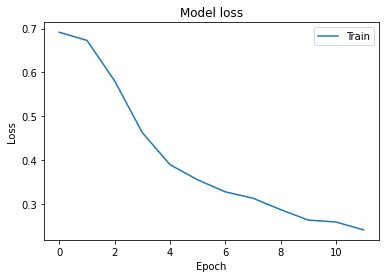

In [38]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

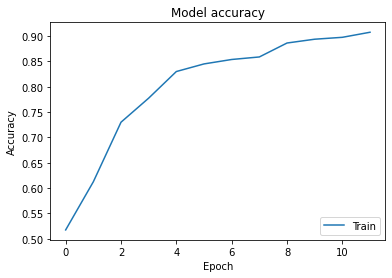

In [39]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()